In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('placement.csv')

In [11]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [12]:
df = df.iloc[:,1:]

In [13]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [14]:
import matplotlib.pyplot as plt

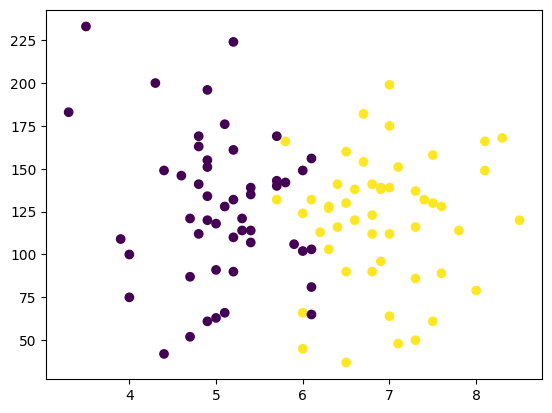

In [16]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [18]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [19]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)


In [25]:
x_test

,cgpa,iq
75,4.8,169.0
44,7.5,61.0
90,7.3,86.0
85,5.8,166.0
67,5.0,118.0
69,8.5,120.0
23,4.7,87.0
47,5.2,161.0
89,4.9,151.0
5,7.1,48.0


In [26]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
x_train=scaler.fit_transform(x_train)

In [31]:
x_train

array([[ 0.10655653,  0.80414322],
       [ 0.82357242,  0.34689085],
       [-0.78971334,  1.31220142],
       [-0.52083238,  0.37229376],
       [-1.23784827,  0.55011412],
       [ 0.37543749, -0.21197317],
       [ 0.55469146, -0.11036153],
       [ 0.2858105 , -0.542211  ],
       [-1.0585943 ,  0.42309958],
       [-0.70008635, -0.87244883],
       [ 0.10655653, -0.542211  ],
       [ 0.01692954, -1.48211866],
       [-0.78971334,  0.09286175],
       [ 1.18208037, -0.21197317],
       [ 0.01692954, -0.56761391],
       [-0.70008635,  2.53154109],
       [-0.61045937, -0.26277899],
       [-0.25195142,  0.19447339],
       [-1.0585943 , -0.31358481],
       [-0.87934033, -0.84704592],
       [ 1.80946928, -1.15188083],
       [-0.25195142,  1.13438105],
       [ 0.73394544,  0.42309958],
       [ 1.27170736,  0.19447339],
       [ 1.63021531, -0.26277899],
       [-0.96896731, -1.60913321],
       [ 0.64431845,  0.7533374 ],
       [-0.52083238,  0.27068212],
       [-0.96896731,

In [32]:
x_test= scaler.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()

In [35]:
clf.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred =clf.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.9

In [45]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

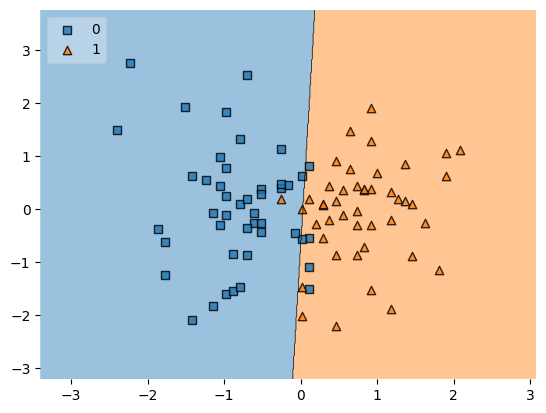

In [49]:
plot_decision_regions(x_train,y_train.values, clf=clf,legend=2)

In [50]:
import pickle

In [51]:
pickle.dump(clf,open('model1.pkl','wb'))

In [53]:
clf.predict([[7,110]])

array([1])